# Mini-projet - Optimisation
### Valentin Alleaume & Elise Lei

## 1. Etude du problème d'optimisation

#### Question 1
> Choisir la variable $z$ à optimiser et préciser sa taille, notée $n$.

La variable $z$ à optimiser est le vecteur contenant les _ordonnées des points qui constitueront_ in fine les "poteaux" de la clotûre, ie. _la courbe que formera la clotûre_ (en effet, les abscisses des "poteaux" sont déjà données par la donnée des $(d_i)_{0\leq i \leq N-1}$).
$$z = (y_1, \dots, y_{N-1})$$

$z$ sera donc de taille $n = N-1$.

#### Question 2
> Formuler le coût $J(z)$ à minimiser.

Ici, on cherche à maximiser la surface disponible pour les moutons. Il suffit de __minimiser l'opposée de la surface disponible__ (que l'on calcule par la méthode des trapèzes).

$$J(z) = - \sum_{i=1}^{N} \dfrac{(y_{i-1} + y_i)(x_i-x_{i-1})}{2} = - \sum_{i=1}^{N} \dfrac{d_{i-1}(y_{i-1} + y_i)}{2}\\
\text{avec } \begin{cases}
    (x_0, y_0) = A = (a,0)\\
    (x_N, y_N) = B = (b,0)
\end{cases}$$
Soit
$$\boxed{J(z) = - \sum_{i=0}^{N-1} \dfrac{d_{i}(y_{i+1} + y_i)}{2}}\\
= -\dfrac{d_0 y_1}{2} - \dfrac{d_{N-1} y_{N-1}}{2} - \sum_{i=1}^{N-2} \dfrac{d_{i}(y_{i+1} + y_i)}{2}$$

#### Question 3
> Enumérer les contraintes égalités associées au problème, et formuler le problème d'optimisation sous la forme :
$$\min_{\underset{g(z)=0}{z\in\mathbb{R}^n}} J(z)$$

On a la contrainte de la longueur de la clotûre qui est fixée.
$$L = \sum_{i=0}^{N-1} \sqrt{d_i^2 + (y_{i+1} - y_i)^2}$$
On pose donc :
$$g(z) = L - \left[ \sqrt{y_1^2 + d_0^2} + \sqrt{y_{N-1}^2 + d_{N-1}^2} + \sum_{i=1}^{N-2} \sqrt{d_i^2 + (y_{i+1} - y_i)^2} \right]$$

Le problème d'optimisation s'exprime donc sous la forme :
$$\min_{\underset{g(z)=0}{z\in\mathbb{R}^n}} J(z)$$

#### Question 4
> A priori, le problème peut-il être non-convexe ?



## 2. Résolution numérique 

In [5]:
# Initialisation de l'environnement python
import numpy as np
import matplotlib.pyplot as plt
from casadi import *
%matplotlib inline

#### Question 5
> Ecrire un algorrithme qui renvoie la solution du problème d'optimisation $(1)$ et les positions $x_i$ associées.

In [29]:
def cost1(n, y, d):
    J = -d[0]*y[0]/2 - d[-1]*y[-1]/2
    for i in range(1,n-1):
        J -= d[i]*(y[i+1]+y[i])/2
    return J

def constraint1(n, y, d, L):
    g = L - (y[0]**2+d[0]**2)**0.5 - (y[-1]**2+d[-1]**2)**0.5
    for i in range(1,n-1):
        g -= ((y[i+1]-y[i])**2+d[i]**2)**0.5
    return g

def init1(n, d, L):
    h = (L - np.sum(d[1:-1]))/2
    y = h * np.ones(n)
    return y

def optimal_curve(a, b, L, N=40, d=None, init_guess=None):
    n = N-1
    if d==None:
        d = (b-a)/N * np.ones(N)       # vecteur des distances entre abscisses
    if init_guess==None:
        init_guess = init1(n,d,L)     # initialisation en un vecteur nul
    opti = casadi.Opti()               # initialisation Casadi
    y = opti.variable(n)
    J = cost1(n,y,d)
    opti.minimize(J)
    opti.subject_to(constraint1(n,y,d,L)==0)
    opti.set_initial(y, init_guess)
    opti.solver('ipopt')
    sol = opti.solve()
    def abscisses(a, b, d):
        x = np.zeros(len(d)+1)
        x[0] = a
        x[-1] = b
        for i in range(1,len(d)):
            x[i] = x[i-1] + d[i-1]
        return x
    x_opt, y_opt = abscisses(a,b,d), np.zeros(N+1)
    y_opt[1:-1] = sol.value(y)
    return x_opt, y_opt

In [34]:
a = 0
b = 100
L = 1000

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       39
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       76

Total number of variables............................:       39
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

 135 -2.2401107e+006 2.34e+004 1.12e+002  -1.0 3.55e+007    -  1.00e+000 3.05e-005f 16
 136 -2.3018857e+006 2.40e+004 1.62e+002  -1.0 3.82e+006    -  1.00e+000 2.44e-004f 13
 137 -2.3210651e+006 2.40e+004 1.62e+002  -1.0 2.11e+006    -  1.00e+000 1.22e-004f 14
 138 -2.3248159e+006 2.41e+004 1.83e+002  -1.0 2.03e+004    -  1.00e+000 7.81e-003f  8
 139 -2.3693496e+006 2.45e+004 1.85e+002  -1.0 1.41e+006    -  1.00e+000 4.88e-004f 12
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 -2.3798095e+006 2.45e+004 1.83e+002  -1.0 7.52e+005    -  1.00e+000 2.44e-004f 13
 141 -8.3549709e+005 1.20e+004 1.90e+002  -1.0 1.86e+004    -  1.00e+000 1.00e+000h  1
 142 -1.5241572e+006 2.36e+004 1.30e+002  -1.0 1.20e+010    -  1.00e+000 9.54e-007f 21
 143 -2.1442383e+006 2.36e+004 1.30e+002  -1.0 8.16e+010    -  1.00e+000 1.19e-007f 24
 144 -2.2270178e+006 2.36e+004 1.30e+002  -1.0 3.41e+008    -  1.00e+000 3.81e-006f 19
 145 -2.3142725e+006 2.41e+004 1.90e+002  -1.0 1.

 276 -2.3166530e+006 2.39e+004 8.99e+001  -1.0 1.29e+005    -  1.00e+000 1.95e-003f 10
 277 -2.3223376e+006 2.39e+004 9.73e+001  -1.0 3.33e+004    -  1.00e+000 1.95e-003f 10
 278 -1.1107506e+006 2.10e+004 9.00e+001  -1.0 1.33e+004    -  1.00e+000 1.00e+000h  1
 279 -2.1815197e+006 2.38e+004 9.75e+001  -1.0 9.98e+010    -  1.00e+000 1.19e-007f 24
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 -2.3427047e+006 2.43e+004 9.00e+001  -1.0 8.67e+008    -  1.00e+000 3.81e-006f 19
 281 -2.3784137e+006 2.46e+004 9.75e+001  -1.0 3.25e+006    -  1.00e+000 1.22e-004f 14
 282 -2.3918788e+006 2.46e+004 8.96e+001  -1.0 5.88e+005    -  1.00e+000 4.88e-004f 12
 283 -3.6068801e+005 6.10e+003 9.75e+001  -1.0 2.46e+004    -  1.00e+000 1.00e+000h  1
 284 -9.5880469e+005 1.23e+004 9.00e+001  -1.0 6.43e+009    -  1.00e+000 1.91e-006f 20
 285 -1.7064137e+006 2.27e+004 9.75e+001  -1.0 4.36e+009    -  1.00e+000 1.91e-006f 20
 286 -2.2468015e+006 2.33e+004 9.00e+001  -1.0 4.

 411 -8.8287819e+004 3.53e+001 9.67e+001  -1.0 1.37e+001    -  1.00e+000 1.00e+000f  1
 412 -1.9974191e+005 2.32e+003 9.00e+001  -1.0 2.33e+003    -  1.00e+000 1.00e+000f  1
 413 -7.6331866e+005 1.25e+004 9.75e+001  -1.0 2.05e+008    -  1.00e+000 3.05e-005f 16
 414 -1.5934331e+006 1.94e+004 9.00e+001  -1.0 3.57e+010    -  1.00e+000 4.77e-007f 22
 415 -2.1161677e+006 2.41e+004 9.75e+001  -1.0 6.09e+009    -  1.00e+000 9.54e-007f 21
 416 -2.3267982e+006 2.41e+004 9.75e+001  -1.0 4.53e+009    -  1.00e+000 9.54e-007f 21
 417 -2.3501032e+006 2.42e+004 8.84e+001  -1.0 3.94e+006    -  1.00e+000 1.22e-004f 14
 418 -1.2037474e+005 7.52e+002 9.75e+001  -1.0 2.42e+004    -  1.00e+000 1.00e+000h  1
 419 -9.6197046e+005 1.73e+004 9.00e+001  -1.0 1.77e+007    -  1.00e+000 9.77e-004f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 420 -1.5467912e+006 1.73e+004 9.00e+001  -1.0 5.45e+010    -  1.00e+000 1.19e-007f 24
 421 -1.8315677e+006 2.01e+004 9.75e+001  -1.0 8.

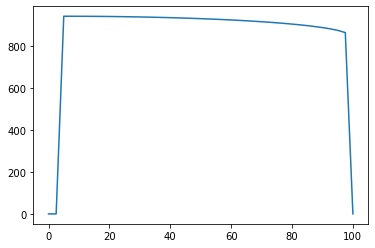

In [35]:
x, y = optimal_curve(a,b,L)
plt.plot(x,y)